In [9]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

In [10]:
dataloader = dataset.mnist_dataloader(map_fn=lambda x: x / 255., batch_size=256)

In [11]:

model = Model([
    nn.conv2d(n_filter=32, kernel_size=(3,3), strides=1),
    nn.relu(),
    # nn.conv2d(n_filter=32, kernel_size=(3,3), strides=1),
    # nn.relu(),
    nn.flatten(),
    # nn.dense(256),
    # nn.relu(),
    # nn.dropout(),
    nn.dense(10),
    nn.softmax()
])
model.fit(data_loader=dataloader,
          optimizer=optimizers.sgd(lr=1e-1),
          loss_fn=loss.categorical_cross_entropy(),
          epochs=100,
          metrics=['accuracy'])

epoch: [  1\100 -------------------- loss: 0.400 valid loss: 0.370 valid accuracy: 0.891
epoch: [  2\100 -------------------- loss: 0.447 valid loss: 0.324 valid accuracy: 0.907
epoch: [  3\100 -------------------- loss: 0.456 valid loss: 0.348 valid accuracy: 0.896
epoch: [  4\100 -------------------- loss: 0.228 valid loss: 0.305 valid accuracy: 0.914
epoch: [  5\100 #------------------- loss: 0.219 valid loss: 0.292 valid accuracy: 0.917
epoch: [  6\100 #------------------- loss: 0.318 valid loss: 0.293 valid accuracy: 0.915
epoch: [  7\100 #------------------- loss: 0.269 valid loss: 0.282 valid accuracy: 0.919
epoch: [  8\100 #------------------- loss: 0.191 valid loss: 0.276 valid accuracy: 0.924
epoch: [  9\100 #------------------- loss: 0.218 valid loss: 0.268 valid accuracy: 0.925
epoch: [ 10\100 ##------------------ loss: 0.214 valid loss: 0.259 valid accuracy: 0.929
epoch: [ 11\100 ##------------------ loss: 0.218 valid loss: 0.251 valid accuracy: 0.928
epoch: [ 12\100 ##---

In [12]:
x, y = dataset.mnist_testdata()
x = x / 255.

In [13]:
y_hat = model.predict(x)
model.accuracy(y_hat, y)

DeviceArray(0.98130006, dtype=float32)

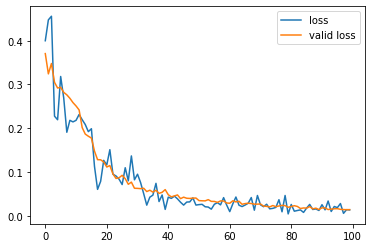

In [14]:
l1, = plt.plot(model.losses)
l2, = plt.plot(model.valid_losses)
plt.legend([l1, l2], ['loss', 'valid loss'])
plt.show()

In [15]:
y_hat = model.predict(x[:20])
jnp.argmax(y_hat, axis=1), y[:20]

(DeviceArray([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4], dtype=int32),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
       dtype=uint8))